In [1]:
import pandas as pd

# Module Assignment 04
Richard Timpson  
Solar Irradiance and Energy Production

For this assignment I would like to explore the relationship between the solar irradiance exposure to photovaultaic solar panels and the actual energy output that they produce for residential and commercial solar energy production systems. While exploring this relationship there are two major important factors to consider. One is solar irradiance which is a measure of the potential solar energy output for a given surface area and can be estimated by using various methods (see this link for more information). The other is the actual architecture of given solar panel system. This includes the number of panels and total surface area of exposure, the panel tilt and orientation, and the panel efficiency and effectivness in producing energy. There is a well defined mathematical relationship of the theoretical energy output of a given solar panel system using the solar irradiance and panel architecture. I would like to test the effectiveness of this theoretical model using real world data. I have gathered several data sets that I need to combine to perform the analysis. One for solar energy production, one for panel system architecture, and one for solar irradiance. I'm not going to add the data gathering code because it was a complicated enough project on its own and a lot of it I have used for other assignments. The focus of this project will be on the data merge between the simulated output of the systems using the solar irradiance and architecture datasets, and the actual output of the systems using the production data

In [2]:
DATA_PATH = '../../../data'

# Read in Data

## Architecture Data
The panel architecutre has information about each separate panel.

In [3]:
# panel architecture
architecture_df = pd.read_csv(f'{DATA_PATH}/panel_architecture.csv')
architecture_df

,site_id,site_name,group_id,x,y,height,width,azimuth,module_orientation,module_tilt,...,module_height,vSpacing,hSpacing,num_rows,num_columns,module_id,row,column,id,inverterId
0,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504693,6,4,17962171,17962133
1,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504701,5,2,17962142,17962133
2,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504716,2,3,17962155,17962133
3,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504700,4,1,17962153,17962133
4,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504709,2,2,17962148,17962133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943316,0,13,47222810,47222771
1076,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943332,0,16,47222802,47222771
1077,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943323,0,1,47222805,47222771
1078,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943340,0,2,47222783,47222771


In [18]:
# site_architecture_df = architecture_df[architecture_df['site_id'] == 103941]
# groups = site_architecture_df.groupby(['module_tilt', 'azimuth'])
# list(groups.groups.keys())
# tilt = list(groups.groups.keys())[0][0]
# azimuth = list(groups.groups.keys())[0][1]
# print(tilt)
# print(azimuth)

In [19]:
# for site in production_md:
#     site_id = int(site['id'])
#     site_architecture_df = architecture_df[architecture_df['site_id'] == site_id]
#     groups = site_architecture_df.groupby(['module_tilt', 'azimuth'])
#     num_arrays = len(group.groups)
#     if num_arrays == 1:
#         tilt = list(groups.groups.keys())[0][0]
#         azimuth = list(groups.groups.keys())[0][1]
#     print(f'Number of arrays for system {site_id}: {len(groups.groups)}')

## Irradiance Data
I have irradiance data for several different site locations that correspond with the location of the solar panel system. I'm going to read in the irradiance data for all locations in a dictionary. I first want to read in a site irradiance metadata file that will give me the unique ids of each system

In [20]:
import json

with open(f'{DATA_PATH}/irradiance_data/irradiance_metadata.json', 'r') as file:
    s = file.read()
    irradiance_md = json.loads(s)
irradiance_md

{'113805': {'start_year': 2015,
  'end_year': 2018,
  'md': {'Source': 'NSRDB',
   'Location ID': 113805,
   'City': '-',
   'State': '-',
   'Country': '-',
   'Latitude': 36.97,
   'Longitude': -112.98,
   'Time Zone': 0,
   'Elevation': 1510,
   'Local Time Zone': -7,
   'Clearsky DHI Units': 'w/m2',
   'Clearsky DNI Units': 'w/m2',
   'Clearsky GHI Units': 'w/m2',
   'Dew Point Units': 'c',
   'DHI Units': 'w/m2',
   'DNI Units': 'w/m2',
   'GHI Units': 'w/m2',
   'Solar Zenith Angle Units': 'Degree',
   'Temperature Units': 'c',
   'Pressure Units': 'mbar',
   'Relative Humidity Units': '%',
   'Precipitable Water Units': 'cm',
   'Wind Direction Units': 'Degrees',
   'Wind Speed': 'm/s',
   'Cloud Type -15': None,
   'Cloud Type 0': 'Clear',
   'Cloud Type 1': 'Probably Clear',
   'Cloud Type 2': 'Fog',
   'Cloud Type 3': 'Water',
   'Cloud Type 4': 'Super-Cooled Water',
   'Cloud Type 5': 'Mixed',
   'Cloud Type 6': 'Opaque Ice',
   'Cloud Type 7': 'Cirrus',
   'Cloud Type 8': '

The irradiance data gives three different irradiance measures, GHI, DHI, DNI (to be explained later), and several different weather measures every 30 minutes from as early as we there is production data for a location to the end of 2018

In [21]:
irradiance_dfs = {}
for key, value in irradiance_md.items():
    try:
        df = pd.read_csv(f'{DATA_PATH}/irradiance_data/{key}/irradiance_data.csv')
    except:
        print(f'No irradiance data for site {key}')
    else:
        irradiance_dfs[key] = df
irradiance_dfs['80122']

No irradiance data for site 116439


,Unnamed: 0,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle
0,0,2018,1,1,0,0,67,44,151,1.5,16.7,81.12
1,1,2018,1,1,0,30,34,24,147,1.6,16.3,86.25
2,2,2018,1,1,1,0,2,3,20,1.7,15.8,91.92
3,3,2018,1,1,1,30,0,0,0,1.9,15.5,97.59
4,4,2018,1,1,2,0,0,0,0,2.0,15.2,103.43
...,...,...,...,...,...,...,...,...,...,...,...,...
17515,17515,2018,12,31,21,30,418,128,598,3.2,16.5,61.02
17516,17516,2018,12,31,22,0,239,182,130,3.3,16.5,64.00
17517,17517,2018,12,31,22,30,261,131,340,3.3,16.3,67.59
17518,17518,2018,12,31,23,0,170,96,235,3.4,16.1,71.71


## Production data
Similar to the irradiance data, there is a metadata file that holds information about the production data for each separate solar panel system. Some of the solar panel systems have the same irradiance site readings, so there will be more panel systems than there will be irradiance sites. The metadata holds information about which irradiance site corresponds with the production data. The production data is spread over many files (for github hosting reasons) for a single system, so we'll have to loop through the files to create a single data frame

# TODO: Remake a different site_metadata file that is to be used just for the school project and that doesn't have any personal information

In [22]:
with open(f'{DATA_PATH}/production_data/site_metadata.json', 'r') as file:
    s = file.read()
    production_md = json.loads(s)
production_md

[{'id': 103941,
  'name': 'Alan Knudson House',
  'accountId': 53921,
  'status': 'Active',
  'peakPower': 10.36,
  'lastUpdateTime': '2020-01-21',
  'currency': 'USD',
  'installationDate': '2015-01-31',
  'ptoDate': None,
  'notes': '',
  'type': 'Optimizers & Inverters',
  'location': {'country': 'United States',
   'state': 'Arizona',
   'city': 'Centennial Park',
   'address': 'Taylor Court 1745',
   'address2': '',
   'zip': '86021',
   'timeZone': 'America/Phoenix',
   'countryCode': 'US',
   'stateCode': 'AZ',
   'lat': 36.9587533,
   'long': -112.9758274},
  'alertQuantity': 0,
  'primaryModule': {'manufacturerName': 'RENESOLA',
   'modelName': 'SE11400A-US',
   'maximumPower': 310.0,
   'temperatureCoef': -0.4},
  'uris': {'PUBLIC_URL': 'https://monitoring.solaredge.com/solaredge-web/p/public?name=Alan Knudson Canopy',
   'DATA_PERIOD': '/site/103941/dataPeriod',
   'DETAILS': '/site/103941/details',
   'OVERVIEW': '/site/103941/overview'},
  'publicSettings': {'name': 'Alan 

In [23]:
import os

def read_production_data(site_id):
    path = f'{DATA_PATH}/production_data/{site_id}/production_data'
    dfs = []
#     production_df = pd.read_csv(f'data/{house}')
    for subdir, dir, files in os.walk(path):
        for file in files:
            file_path = os.path.join(subdir, file)
            df = pd.read_csv(file_path)
            dfs.append(df)
    production_df = pd.concat(dfs)
    return production_df

The production data holds the system output in 15 minute increments for as long as the system has data

In [24]:
production_dfs = {}
for site in production_md:
    site_id = str(site['id'])
    df = read_production_data(site_id)
    production_dfs[site_id] = df
production_dfs['103941']

,date,value
0,2018-02-01 00:00:00,NaN
1,2018-02-01 00:15:00,NaN
2,2018-02-01 00:30:00,NaN
3,2018-02-01 00:45:00,NaN
4,2018-02-01 01:00:00,NaN
...,...,...
173563,2019-06-30 22:45:00,NaN
173564,2019-06-30 23:00:00,NaN
173565,2019-06-30 23:15:00,NaN
173566,2019-06-30 23:30:00,NaN


# Data Resampling
The main join is going to be happening on a timestamp between the observed production data and the predicted simulated production data. Because the solar irradiance comes in 30 minute increments, we'll need to resample the production data to 30 minute intervals taking the average of the values. We'll need to do a few things before we can join

1. Create a new dataset that has the simulated production using the irradiance data and panel architecture for as long a time period as possible (stops at 2018) that is sampled every half hour. We only want the simulated values from the start of the actual production beginning, to the min(2018, production_data_end). This will allow for a join with the production data.
2. Create a datetime index on the production data for each system and resample to 30 minute intervals. 

After we join the two datasets we will clean up any 0 values. 

## Create new simulated dataset
We can break this down into several steps. 

### 1. Get the time interval of simulation data for each production system 

In [25]:
import datetime

def get_start_end_for_simulation(site):
    start_time_str = site['time_interval']['startDate']
    start_time = datetime.datetime.strptime(start_time_str, '%Y-%m-%d')
    production_end_time_str = site['time_interval']['endDate']
    production_end_time = datetime.datetime.strptime(production_end_time_str, '%Y-%m-%d')
    end_time_2018 = datetime.datetime(year=2018, month=12, day=31, hour = 23, minute = 30)

    end_time = production_end_time if production_end_time < end_time_2018 else end_time_2018

    return start_time, end_time

### 2. Calculate the simulate production for all available solar irradiance times as a series, and use that along with the interval to create a new data frame with the simulated data

To perform the simulation, we are going to be using the System Advisor Model (SAM) from the National Renewal Energy Laboratory(NREL). They provide an [api](https://sam.nrel.gov/software-development-kit-sdk.html) that allows various configurations to be set for a simulation to be run. In this case, we can input information about the irradiance data at the specified time intervals, along with some of the revelant information from the panel architecture dataset.  

Running the experiment proved to be troublesome, and I was not able to get simulation data for all systems. The SAM api runs one simulation based on the system capacity, module tilt, and azimuth angle. Many of the systems had more than one array of panels with different tilts and azimuth angles, so I decided to just skip those systems to make things simpler. Otherwise I would have had to treat each separate array as it's own simulation and perform some calculation to get the capacity of an individual array. 

It was also the case that some of the simulations did not run. The simulation API is just a wrapper for lower level C functions, so it would have taken more time than I would have liked to debug the broken simulations. This left me with only a few systems for which I was able to actually obtain simulation data. This is not ideal, but at least it gave me something.  

Another important thing to note is that I made several assumptions when inputting information into the SAM model. I was not able to obtain information about each of the site inverters, so I set the DC/AC ratio at 1, and the inverter efficiency at 95%. These assumptions could potentially have a large impact on the result of the simulation, but I wanted to set them to numbers that would be conservative and reasonable. This means the simulation will not be totally accurate, but should produce non-trivial results. 

Much of this code was adapted from NREL's National Solar Radiation Database (NSRDB) [website and api](https://nsrdb.nrel.gov/data-sets/api-instructions.html), which was also used to gather the solar irradiance data. 

I first want to install the python wrapper for the SAM functions

In [26]:
#!conda install nrel-pysam

The following functions are used to perform the simulation. There are quite a large number of simulation parameters, but each is simple enough to understand. The most difficult part was extracting out the relevant information from the production site metadata, the irradiance data, and also the panel architecture data. The result of the simulation function is a data frame which holds the simulation values at 30 minute intervals for a given system. In a way, this is the result of joining multiple data from multiple datasets (mostly just metadata), to produce a result that has information from the

In [28]:
from PySAM.PySSC import PySSC
import numpy as np

def get_panel_tilt_azimuth(site):
    site_id = int(site['id'])
    site_architecture_df = architecture_df[architecture_df['site_id'] == site_id]
    groups = site_architecture_df.groupby(['module_tilt', 'azimuth'])
    num_arrays = len(groups.groups)
    if num_arrays == 1:
        tilt = list(groups.groups.keys())[0][0]
        azimuth = list(groups.groups.keys())[0][1]
        return tilt, azimuth
    else:
        return None, None

def get_resource_inputs(ir_md):
    lat = ir_md['md']['Latitude']
    lon = ir_md['md']['Longitude']
    timezone = ir_md['md']['Time Zone']
    elevation = ir_md['md']['Elevation']
    return {
        'lat': lat,
        'lon': lon, 
        'timezone': timezone, 
        'elevation': elevation
    }

def get_system_inputs(site):
    system_capacity = float(site['peakPower'])
    tilt, azimuth = get_panel_tilt_azimuth(site)
    if tilt is not None and azimuth is not None:
        return {
            'system_capacity': system_capacity, 
            'tilt': tilt, 
            'azimuth': azimuth
        }
    else:
        return None

def simulate_prod_data(ir_df, site):
    ssc = PySSC()

    system_inputs = get_system_inputs(site)
    if system_inputs is not None:
        irradiance_site_id = str(site['irradiance_site_id'])
        ir_md = irradiance_md[irradiance_site_id]

        resource_inputs = get_resource_inputs(ir_md)

        # Resource inputs for SAM model:
        wfd = ssc.data_create()
        if ssc.data_set_number(wfd, b'lat', resource_inputs['lat']) == 0:
            print('Couldnt set data variable lat')
        if ssc.data_set_number(wfd, b'lon', resource_inputs['lon']) == 0:
            print('Couldnt set data variable lon')
        if ssc.data_set_number(wfd, b'tz', resource_inputs['timezone']) == 0:
            print('Couldnt set data variable  timezone')
        if ssc.data_set_number(wfd, b'elev', resource_inputs['elevation']) == 0:
            print('Couldnt set data variable elevation')
        if ssc.data_set_array(wfd, b'year', ir_df.index.year) == 0:
            print('Couldnt set data variable year')
        if ssc.data_set_array(wfd, b'month', ir_df.index.month) == 0:
            print('Couldnt set data variable month')
        if ssc.data_set_array(wfd, b'day', ir_df.index.day) == 0:
            print('Couldnt set data variable day')
        if ssc.data_set_array(wfd, b'hour', ir_df.index.hour) == 0:
            print('Couldnt set data variable hour')
        if ssc.data_set_array(wfd, b'minute', ir_df.index.minute) == 0:
            print('Couldnt set data variable minute')
        if ssc.data_set_array(wfd, b'dn', ir_df['DNI']) == 0:
            print('Couldnt set data variable DNI')
        if ssc.data_set_array(wfd, b'df', ir_df['DHI']) == 0:
            print('Couldnt set data variable DHI')
        if ssc.data_set_array(wfd, b'wspd', ir_df['Wind Speed']) == 0:
            print('Couldnt set data variable wind speed')
        if ssc.data_set_array(wfd, b'tdry', ir_df['Temperature']) == 0:
            print('Couldnt set data variable temperature')

        # Create SAM compliant object  
        dat = ssc.data_create()
        if ssc.data_set_table(dat, b'solar_resource_data', wfd) == 0:
            print("Couldn't set solar_resource_data table")
        ssc.data_free(wfd)


        # Specify the system Configuration
        if ssc.data_set_number(dat, b'system_capacity', system_inputs['system_capacity']) == 0:
            print('Couldnt set data variable system_capacity')
        # Set DC/AC ratio (or power ratio). See https://sam.nrel.gov/sites/default/files/content/virtual_conf_july_2013/07-sam-virtual-conference-2013-woodcock.pdf
        # for now I'm assuming this is 1. May try to update the calcuation if I can find relevant data. 
        if ssc.data_set_number(dat, b'dc_ac_ratio', 1.25) == 0:
            print('Couldnt set data variable dc_ac_ratio')
        # Set tilt of system in degrees
        if ssc.data_set_number(dat, b'tilt', system_inputs['tilt']) == 0:
            print('Couldnt set data variable tilt')
        # Set azimuth angle (in degrees) from north (0 degrees)
        if ssc.data_set_number(dat, b'azimuth', system_inputs['azimuth']) == 0:
            print('Couldnt set data variable azimuth')
        # Set the inverter efficency
        if ssc.data_set_number(dat, b'inv_eff', 98) == 0:
            print('Couldnt set data variable inverter efficiency')
        # Set the system losses, in percent
        if ssc.data_set_number(dat, b'losses', 10) == 0:
            print('Couldnt set data variable losses')
        # Specify fixed tilt system (0=Fixed, 1=Fixed Roof, 2=1 Axis Tracker, 3=Backtracted, 4=2 Axis Tracker)
        if ssc.data_set_number(dat, b'array_type', 1) == 0:
            print('Couldnt set data variable array type')
        # Set ground coverage ratio
        if ssc.data_set_number(dat, b'gcr', 0.2) == 0:
            print('Couldnt set data variable ground coverage ratio')
        # Set constant loss adjustment
        if ssc.data_set_number(dat, b'adjust:constant', 0) == 0:
            print('Couldnt set data variable constant loss adjustment')

        # execute and return new dataframe with dates and resulting simulation values
        mod = ssc.module_create(b'pvwattsv5')
        if mod == 0:
            print("Couldn't create module")
        if ssc.module_exec(mod, dat) == 0:
            print("Couldn't exec created module")
            return None
        else:
            ret = np.array(ssc.data_get_array(dat, b'gen'))
            # print(f'Irradiance site {irradiance_site_id}')
            # print(ret)
            df_copy = ir_df.copy()
            df_copy['simulation_results'] = ret
            ssc.data_free(dat)
            ssc.module_free(mod)
            return df_copy['simulation_results']
    else:
        print(f'System {site["id"]} has more than one array, not simulating data')
        return None

In [29]:
def set_ir_df_datetime_idx(ir_df):
    ir_df['date'] = ir_df.apply(lambda row: datetime.datetime(
        year=int(row['Year']), 
        month=int(row['Month']), 
        day=int(row['Day']), 
        hour=int(row['Hour']), 
        minute=int(row['Minute']), 
        ), axis=1)
    ir_df = ir_df.set_index('date')
    return ir_df

We are able to get simulation data for 4 of the systems

In [50]:
irradiance_simulation_dfs = {}

for site in production_md:
    site_id = site['id']
    start_time, end_time = get_start_end_for_simulation(site)    
    ir_site_id = str(site['irradiance_site_id'])
    try:
        ir_df = irradiance_dfs[ir_site_id]
    except:
        print(f'System {ir_site_id} does not have irradiance data')
    else:
        ir_df = set_ir_df_datetime_idx(ir_df)
        simulation = simulate_prod_data(ir_df, site)
        if simulation is not None:
            simulation = simulation.to_frame()
            irradiance_simulation_dfs[str(site_id)] = simulation
            # print(type(simulation))
irradiance_simulation_dfs.keys()

Couldn't exec created module
System 116439 does not have irradiance data
System 238320 has more than one array, not simulating data
System 349060 has more than one array, not simulating data
System 896164 has more than one array, not simulating data
System 717193 has more than one array, not simulating data
System 627759 has more than one array, not simulating data
System 569932 has more than one array, not simulating data
System 256177 has more than one array, not simulating data
Couldn't exec created module


dict_keys(['787197', '477834', '641826', '466851'])

In [51]:
irradiance_simulation_dfs['787197']

,simulation_results
date,
2018-01-01 00:00:00,0.543776
2018-01-01 00:30:00,0.000000
2018-01-01 01:00:00,0.000000
2018-01-01 01:30:00,0.000000
2018-01-01 02:00:00,0.000000
...,...
2018-12-31 21:30:00,5.626257
2018-12-31 22:00:00,4.943890
2018-12-31 22:30:00,4.224286


In [52]:
irradiance_simulation_dfs['477834']

,simulation_results
date,
2017-01-01 00:00:00,0.000000
2017-01-01 00:30:00,0.000000
2017-01-01 01:00:00,0.000000
2017-01-01 01:30:00,0.000000
2017-01-01 02:00:00,0.000000
...,...
2018-12-31 21:30:00,1.229101
2018-12-31 22:00:00,0.532813
2018-12-31 22:30:00,0.410094


## 2. Create a datetime index on the production data for each system and resample to 30 minute intervals. 
Because we only have simulation data for 4 systems we'll only need to resample 4 systems. Right now the production data exists in 15 minute samples. We want it to be in 30 minute samples. We'll convert the index to a datetime and resample with a sum. The irradiance data time comes in UTC, whereas the production time is specific to the timezone. When we convert to datetime index, we need to keep the timezone into account, and convert both times to UTC

In [53]:
resampled_production_dfs = {}
for key, df in irradiance_simulation_dfs.items():
    production_df = production_dfs[key]
    # convert index to date
    production_df['date'] = pd.to_datetime(production_df['date'])
    production_df = production_df.set_index('date')
    # find timezone for production site 
    # for now this is a linear search because the site metadata isn't a 
    # dictionary. Should change this but am too lazy to 
    timezone = ''
    for site in production_md:
        if str(site['id']) == key:
            timezone = site['location']['timeZone']

    # Setting the nonexistent time to be Nan because 
    # the nonexistent times (due to DST) always fall in the night when production 
    # is irrelevant. Setting ambiguous to NaT as it's not important either
    # times will always be during the nigth
    production_df = production_df.tz_localize(timezone, nonexistent='NaT', ambiguous='NaT')

    # convert time index to utc. 
    production_df = production_df.tz_convert(None)

    # print(production_df)
    resampled_production_dfs[key] = production_df

# Perform the Join between the actual production data and the simulated production data
Because the simulated production data is going to have less values than the production data, we'll want to do a **left join on the simulated data.** Most of the values for both the simulated and production data will be 0. *We only want to remove the rows where both have a 0 value*. We'll first do the left join, and then clear out the 0 values

## Left join on simulated data
We'll first get the value counts of both the simulated data and observed data for all relevant data frames, perform the join, and then get the value count of the resulting dataframe to ensure that joined data frame only has as many values as the simulated data. The number of rows in the joined dataframe is the same as the simulation dataframe, so we know it joined successfully

In [97]:
joined_dfs = {}

for key, simulation_df in irradiance_simulation_dfs.items():
    production_df = resampled_production_dfs[key]

    print(f'System {key}')
    print(f'Shape of the simulated data:  {simulation_df.shape}')
    print(f'Shape of the production data:  {production_df.shape}')
    print('Performing the join')

    # print(simulation_df.index)
    # print(production_df.index)
    joined_df = simulation_df.merge(production_df, how='inner', left_index=True, right_index=True)
    joined_df = joined_df.rename(columns={'value': 'production_data'})
    print(f'Shape of the joined data: {joined_df.shape}')
    print()
    joined_dfs[key] = joined_df

System 787197
Shape of the simulated data:  (17520, 1)
Shape of the production data:  (52608, 1)
Performing the join
Shape of the joined data: (7762, 2)

System 477834
Shape of the simulated data:  (35040, 1)
Shape of the production data:  (100704, 1)
Performing the join
Shape of the joined data: (31802, 2)

System 641826
Shape of the simulated data:  (17520, 1)
Shape of the production data:  (68352, 1)
Performing the join
Shape of the joined data: (15630, 2)

System 466851
Shape of the simulated data:  (35040, 1)
Shape of the production data:  (101952, 1)
Performing the join
Shape of the joined data: (32426, 2)



## Clean up the resulting join data
Look at one of the resulting joins to see the result. From first appearance, this seems to be what we want. However, there is an obvious mismatch in the units between the simulated results and the production data. The simulation is producing kWh (kilowatt hours), whereas the production data is reporting WH (watt hours). Because kWh is a more standard unit, we'll divide all of the values by 1000. First, we need to clean all null values that exists in both reports. After the clean, if there are any resulting NaN, we want to conver those to be an actual 0 number. We'll then do the division, ignoring any 0 values

In [98]:
joined_dfs['787197']

,simulation_results,production_data
date,,
2018-07-23 07:00:00,0.000000,NaN
2018-07-23 07:30:00,0.000000,NaN
2018-07-23 08:00:00,0.000000,NaN
2018-07-23 08:30:00,0.000000,NaN
2018-07-23 09:00:00,0.000000,NaN
...,...,...
2018-12-31 21:30:00,5.626257,1160.0
2018-12-31 22:00:00,4.943890,1095.0
2018-12-31 22:30:00,4.224286,928.0


We'll first want to do some initial analysis to see what we need to clean the 0 values.  
Printing the value counts of both columns shows that for the simulation there are many 0 values.  
For the production data there are both 0 values and Nan. This means we'll want to convert all 0 values in both 
columns to be NaN, and then we can use the dropna method successfully

In [152]:
df = joined_dfs['477834']

# 
print(df['simulation_results'].value_counts(dropna=False))
print(df['production_data'].value_counts(dropna=False))
df = df.replace(float(0), np.nan)
cleaned_null_df = df.dropna(axis=0, how='all', subset=['simulation_results','production_data'])
print(df['production_data'].value_counts())

cleaned_df = cleaned_null_df.copy()
cleaned_df['production_data'] = cleaned_df['production_data'] / 1000
cleaned_df.head(50)

0.000000    15838
3.584000      413
1.474779        1
0.508363        1
0.721345        1
            ...  
0.595208        1
1.113037        1
2.367905        1
2.959435        1
1.442867        1
Name: simulation_results, Length: 15553, dtype: int64
NaN       17035
0.0        8221
2.0          39
5.0          32
1.0          32
          ...  
450.0         1
1007.0        1
982.0         1
440.0         1
455.0         1
Name: production_data, Length: 1005, dtype: int64
2.0       39
1.0       32
4.0       32
5.0       32
3.0       24
          ..
595.0      1
211.0      1
1004.0     1
478.0      1
455.0      1
Name: production_data, Length: 1003, dtype: int64


,simulation_results,production_data
date,,
2017-03-09 14:00:00,0.051281,NaN
2017-03-09 14:30:00,0.429706,NaN
2017-03-09 15:00:00,0.945748,NaN
2017-03-09 15:30:00,1.475503,NaN
2017-03-09 16:00:00,1.947943,NaN
2017-03-09 16:30:00,2.377553,NaN
2017-03-09 17:00:00,2.396009,NaN
2017-03-09 17:30:00,3.069354,NaN
2017-03-09 18:00:00,3.242160,NaN


We now know know how to clean one data frame. Let's write a wrapper function that will do it for all of them 

In [141]:
def clean_joined_df(joined_df): 
    df = joined_df.replace(float(0), np.nan)
    cleaned_null_df = df.dropna(axis=0, how='all', subset=['simulation_results','production_data'])

    cleaned_df = cleaned_null_df.copy()
    cleaned_df['production_data'] = cleaned_df['production_data'] / 1000
    return cleaned_df

Run that function for every data frame

In [238]:
cleaned_joined_dfs = {}
for key, joined_df in joined_dfs.items():
    cleaned_df = clean_joined_df(joined_df)
    cleaned_joined_dfs[key] = cleaned_df

The following is a function that will plot the two data points with the sum of the monthly output

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline


def plot_joined_df(joined_df):
    df = joined_df.resample('D', how='sum')
    # df = cleaned_df.loc[(cleaned_df.index.month == 8) & (cleaned_df.index.day == 1)]
    plt.figure(figsize=(12,5))
    sim = plt.scatter(x=df.index, y=df['simulation_results'])
    prod = plt.scatter(x=df.index, y=df['production_data'])
    plt.title(f'System {key}')
    plt.xlabel('Day')
    plt.ylabel('Total daily output in kWh')
    plt.legend((sim, prod), ('Simulated production', 'Actual Production'))

    plt.show()

Run the graph for every system. This graph shows us that there are large holes in the production data. Upon further inspection of the actual data source, I found out that there was actually 0 production reported for the time periods that this graph is showing. This is disappointing, as it reduces the amount of data points we have even further. I'll need to do a further clean up of the data. Because it is just for these specific system, I'll manually find the date ranges and remove them from the joined data

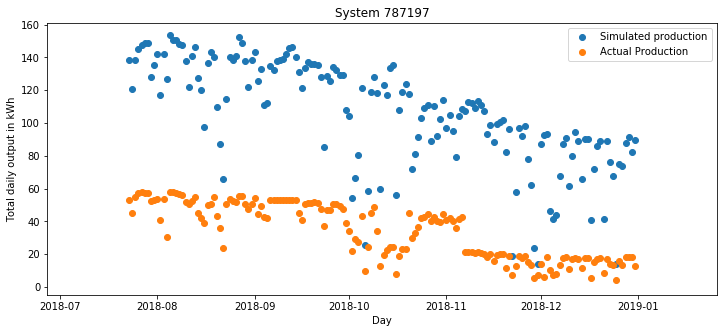

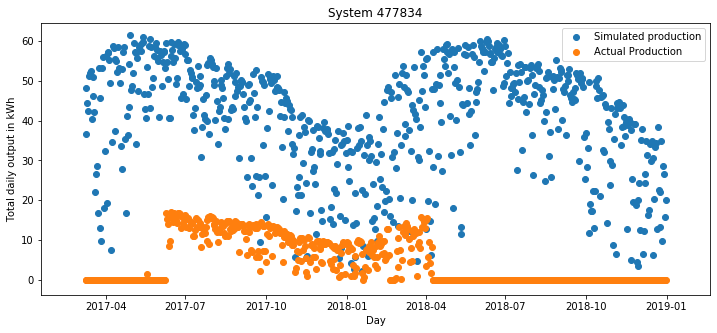

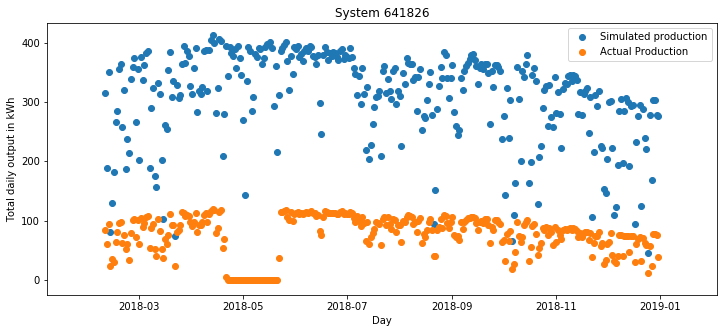

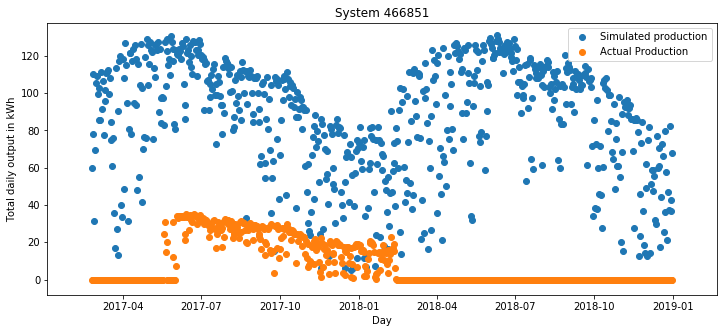

In [240]:
for key, df in cleaned_joined_dfs.items():
    plot_joined_df(df)

In [241]:
cleaned_joined_dfs['477834']

,simulation_results,production_data
date,,
2017-03-09 14:00:00,0.051281,NaN
2017-03-09 14:30:00,0.429706,NaN
2017-03-09 15:00:00,0.945748,NaN
2017-03-09 15:30:00,1.475503,NaN
2017-03-09 16:00:00,1.947943,NaN
...,...,...
2018-12-31 21:30:00,1.229101,NaN
2018-12-31 22:00:00,0.532813,NaN
2018-12-31 22:30:00,0.410094,NaN


In [242]:
cleaned_joined_dfs['641826']

,simulation_results,production_data
date,,
2018-02-09 14:30:00,0.095414,NaN
2018-02-09 15:00:00,4.028071,NaN
2018-02-09 15:30:00,8.056464,2.203
2018-02-09 16:00:00,11.029002,3.069
2018-02-09 16:30:00,13.193117,3.874
...,...,...
2018-12-31 21:30:00,17.962055,1.069
2018-12-31 22:00:00,14.846706,0.812
2018-12-31 22:30:00,12.679492,0.950


In [243]:
cleaned_joined_dfs['466851']

,simulation_results,production_data
date,,
2017-02-24 14:30:00,0.330011,NaN
2017-02-24 15:00:00,1.225419,NaN
2017-02-24 15:30:00,2.235106,NaN
2017-02-24 16:00:00,3.228396,NaN
2017-02-24 16:30:00,4.178629,NaN
...,...,...
2018-12-31 21:30:00,4.825043,NaN
2018-12-31 22:00:00,4.080825,NaN
2018-12-31 22:30:00,3.317240,NaN


## Date ranges for systems

### System 447834
0 Values
* 2017-03-09 - 2017-6-09
* 2018-04-08 - present  

Real values 
* 2017-6-10 - 2018-04-09
### System 641826
0 Values
* 2018-04-20 - 2018-05-23  

Real values 
* 2018-02-09 - 2018-04-19
* 2018-05-24 - 2018-12-31
### System 466851
0 Values
* 2017-02-24 - 2017-05-20
* 2018-02-12 - 2018-12-31  

Real Values 
* 2017-05-21 - 2018-02-11


In [244]:
cleaned_joined_dfs['477834'] = cleaned_joined_dfs['477834']['2017-6-10':'2018-04-09']
cleaned_joined_dfs['641826'] = pd.concat( [cleaned_joined_dfs['641826']['2018-04-20':], cleaned_joined_dfs['641826'][:'2018-05-23'] ] )
# cleaned_joined_dfs['641826'] = cleaned_joined_dfs['641826']['2018-02-09':'2018-04-19']
# cleaned_joined_dfs['641826'] = cleaned_joined_dfs['641826']['2018-5-24':'2018-12-31']
# second_df = cleaned_joined_dfs['641826']
# second_mask = (second_df.index < '2018-04-20') & (second_df.index > '2018-05-23')
second_df = cleaned_joined_dfs['641826']
second_df = second_df.loc[ (second_df.index < '2018-04-20') | (second_df.index > '2018-05-23') ]
cleaned_joined_dfs['641826'] = second_df
cleaned_joined_dfs['466851'] = cleaned_joined_dfs['466851']['2017-5-21':'2018-02-11']

Lets plot all of the systems again. The gap in system 641826 comes from the removal of data at that time. Printing out the values 
of that system for the 4th month shows that the data frame doesn't actually have values after 2018-04-19, but the graph is showing 
them as if they exist. This should not have an affect on a statistical test

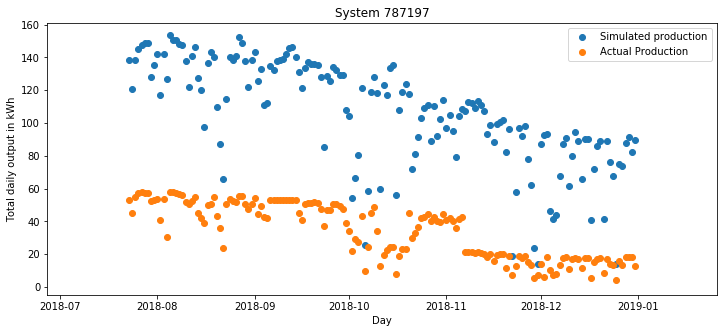

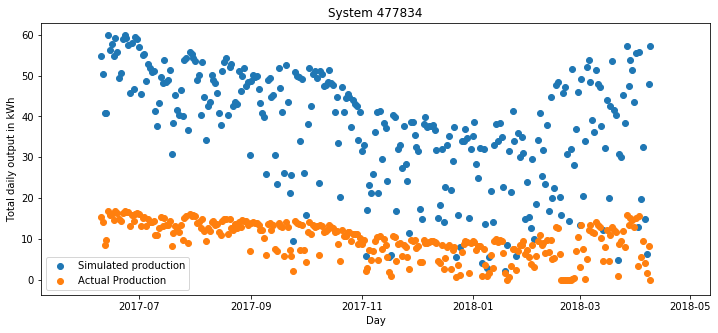

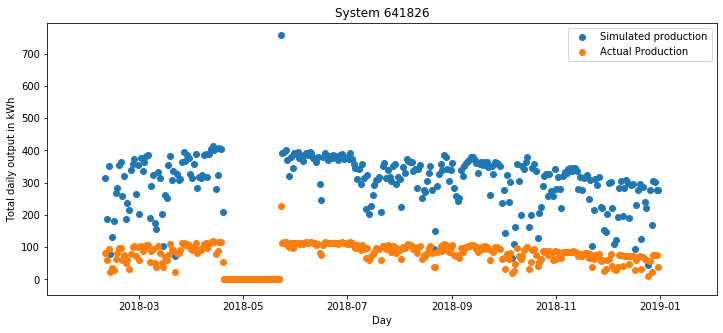

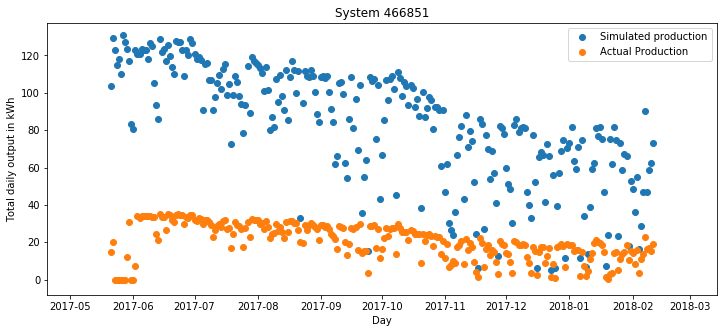

In [245]:
for key, df in cleaned_joined_dfs.items():
    plot_joined_df(df)

In [250]:
cleaned_joined_dfs['641826'][ (cleaned_joined_dfs['641826'].index.year == 2018) & (cleaned_joined_dfs['641826'].index.month == 4) ]

,simulation_results,production_data
date,,
2018-04-01 00:00:00,5.108071,1.361
2018-04-01 00:30:00,3.628731,0.720
2018-04-01 01:00:00,1.766596,0.317
2018-04-01 01:30:00,0.427861,0.052
2018-04-01 13:30:00,0.157626,0.096
...,...,...
2018-04-19 21:30:00,10.837610,4.123
2018-04-19 22:00:00,15.505113,4.026
2018-04-19 22:30:00,7.754587,1.635


# EDA
We have already looked at the shape, cleaned up, and plotted the relevant data. All that is left is to perform a statistical test. We are going to perform multiple **t-tests** for each system, which will compare the mean between the simulated data and the mean of the production data. As can be seen from the graph, it's highly likely that the results will not be statistically significant. 

In [269]:
from scipy.stats import ttest_rel, ttest_ind

def t_test(df):
    simulated = df['simulation_results']
    production = df['production_data']
    stat, p = ttest_ind(simulated, production, nan_policy='omit')
    return stat, p

In [270]:
for key, df in cleaned_joined_dfs.items():
    print(f'System {key}')
    stat, p = t_test(df)
    print(f'\t T test value: {stat}')
    print(f'\t p-value: {p}')


System 787197
	 T test value: 61.95337742136993
	 p-value: 0.0
System 477834
	 T test value: 82.06767512563782
	 p-value: 0.0
System 641826
	 T test value: 91.37792436019757
	 p-value: 0.0
System 466851
	 T test value: 82.9920773310625
	 p-value: 0.0


# Writeup